### Laboratorium 3

In [3]:
# mno�enie macierzy - wersja naiwna
function naive_multiplication(A,B)
C=zeros(Float64,size(A,1),size(B,2))
  for i=1:size(A,1)
    for j=1:size(B,2)
        for k=1:size(A,2)
            C[i,j]=C[i,j]+A[i,k]*B[k,j]
        end
    end
end
C
end

naive_multiplication (generic function with 1 method)

In [4]:
# poprawiona funkcja korzytaj�ca z powy�szego oraz z faktu, �e
#mo�na zmienia� kolejno�� operacji dodawania (a co za tym idzie kolejnosc petli).
function better_multiplication( A,B )
C=zeros(Float64,size(A,1),size(B,2))
  for j=1:size(B,2)
    for k=1:size(A,2)
        for i=1:size(A,1)
            C[i,j]=C[i,j]+A[i,k]*B[k,j]
        end
    end
end
C
end

better_multiplication (generic function with 1 method)

In [5]:
function times_naive_fun(A,B)
times_naive = Array{Float64}(undef, 10)
    for j = 1:10
        times_naive[j] = @elapsed naive_multiplication(A,B)
    end
    return times_naive
end

times_naive_fun (generic function with 1 method)

In [6]:
function times_better_fun(A,B)
times_better = Array{Float64}(undef, 10)
    for j = 1:10
        times_better[j] = @elapsed naive_multiplication(A,B)
    end
    return times_better
end

times_better_fun (generic function with 1 method)

In [7]:
function times_blas_fun(A,B)
times_blas = Array{Float64}(undef, 10)
for j = 1:10
    times_blas[j] = @elapsed A*B
end
return times_blas
end

times_blas_fun (generic function with 1 method)

In [8]:
using DataFrames

In [9]:
s=Array{Float64}(undef, 0)
a=Array{Float64}(undef, 0)
b=Array{Float64}(undef, 0)
c=Array{Float64}(undef, 0)
for i in [20*c for c in 1:20]
    size_of=i;
    A=rand(size_of,size_of);
    B=rand(size_of,size_of);
    size = [i for n in 1:10]
    aa = times_naive_fun(A,B);
    bb = times_better_fun(A,B);
    cc = times_blas_fun(A,B);
    s = vcat(s,size);
    a = vcat(a,aa);
    b= vcat(b,bb);
    c = vcat(c,cc);
end

In [10]:
using Statistics, DataFrames
abc = DataFrame(Size=s,Naive=a,Better=b,Blas=c)
prepared = by(abc, :Size, :Naive => mean, :Better => mean, :Blas => mean, :Naive => std, :Better => std, :Blas => std)

,Size,Naive_mean,Better_mean,Blas_mean,Naive_std,Better_std,Blas_std
,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,20.0,1.86801e-5,2.16601e-5,6.13803e-5,1.20899e-6,1.56717e-6,0.000182492
2,40.0,0.000218551,0.000212971,1.39301e-5,2.93334e-5,5.3891e-5,9.97628e-6
3,60.0,0.000694943,0.000676373,3.38601e-5,6.73148e-5,5.53776e-5,8.72415e-6
4,80.0,0.00179843,0.00177136,0.00010305,0.000206953,0.000113461,0.000197889
5,100.0,0.00350041,0.00393346,8.77903e-5,0.000118064,0.00125328,1.72508e-5
6,120.0,0.0111106,0.0108979,0.00012032,0.0152626,0.0152122,5.34472e-5
7,140.0,0.0154933,0.0103489,0.000162771,0.0150751,0.00235431,0.000212642
8,160.0,0.0294258,0.0144051,0.000121111,0.0297428,0.000239266,4.65972e-5
9,180.0,0.0311168,0.0208085,0.000260251,0.022832,0.000482828,5.29593e-5


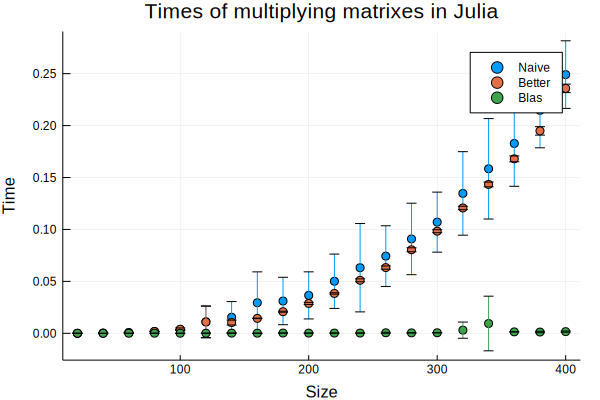

In [11]:
using Plots
scatter(prepared[:Size],[prepared[:Naive_mean],prepared[:Better_mean],prepared[:Blas_mean]],yerr=[prepared[:Naive_std] prepared[:Better_std] prepared[:Blas_std
]],label=["Naive" "Better" "Blas"],xlabel="Size",ylabel="Time",title="Times of multiplying matrixes in Julia")

In [12]:
using CSV
input="times.csv"
mydata=CSV.read(input, delim=";")

,size,time_better,time_naive,time_blas
,Int64⍰,Int64⍰,Int64⍰,Int64⍰
1,20,166227,165948,43583
2,20,165669,165109,23747
3,20,165110,164830,23468
4,20,165109,165389,23468
5,20,174887,165109,23747
6,20,165389,164830,23468
7,20,165669,172932,23468
8,20,165110,164830,23468
9,20,165109,165110,23468


In [13]:
times_grouped=by(mydata, :size, :time_naive => mean, :time_better => mean,:time_blas =>mean,:time_naive =>std,:time_better =>std,:time_blas => std)

,size,time_naive_mean,time_better_mean,time_blas_mean,time_naive_std,time_better_std,time_blas_std
,Int64⍰,Float64,Float64,Float64,Float64,Float64,Float64
1,20,1.6592e5,1.67317e5,25535.2,2486.47,4006.3,6342.41
2,40,1.29322e6,1.29436e6,1.49465e5,7401.23,3909.57,4259.7
3,60,4.33302e6,4.34037e6,4.72001e5,5727.9,17988.5,4928.48
4,80,1.02775e7,1.02899e7,1.17197e6,16627.2,85382.5,5626.3
5,100,2.07589e7,2.03198e7,2.62359e6,1.3e5,2.32713e5,9539.27
6,120,3.51866e7,3.49123e7,4.92649e6,1.89708e5,2.07381e5,14600.1
7,140,5.67137e7,5.64147e7,7.88815e6,4.00314e5,3.41485e5,1.27817e5
8,160,8.60298e7,8.43163e7,1.15684e7,3.29219e5,3.7021e5,35917.0
9,180,1.23647e8,1.20772e8,1.65227e7,3.29048e5,5.4632e5,29002.7


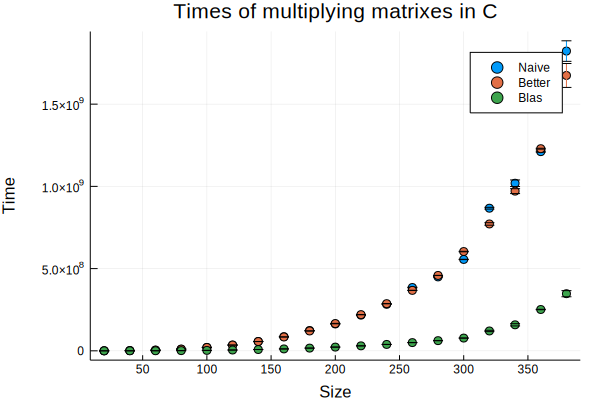

In [14]:
using Plots
scatter(times_grouped[:size],[times_grouped[:time_naive_mean],times_grouped[:time_better_mean],times_grouped[:time_blas_mean]],yerr=[times_grouped[:time_naive_std] times_grouped[:time_better_std] times_grouped[:time_blas_std
]],label=["Naive" "Better" "Blas"],xlabel="Size",ylabel="Time",title="Times of multiplying matrixes in C")

In [15]:
import Pkg
Pkg.add("Polynomials")

 Resolving package versions...
  Updating `~/.julia/Project.toml`
 [no changes]
  Updating `~/.julia/Manifest.toml`
 [no changes]


In [16]:
using Polynomials
xs1 = prepared[:Size]; ys1 = prepared[:Naive_mean]
xs2 = prepared[:Size]; ys2 = prepared[:Better_mean]
xs3 = prepared[:Size]; ys3 = prepared[:Blas_mean]
fit1=polyfit(xs1, ys1,3)
fit2=polyfit(xs2, ys2,3)
fit3=polyfit(xs3, ys3,3)

Poly(0.0013627072988648071 - 3.7808943500191855e-5*x + 2.3233598997260612e-7*x^2 - 3.266917637898022e-10*x^3)

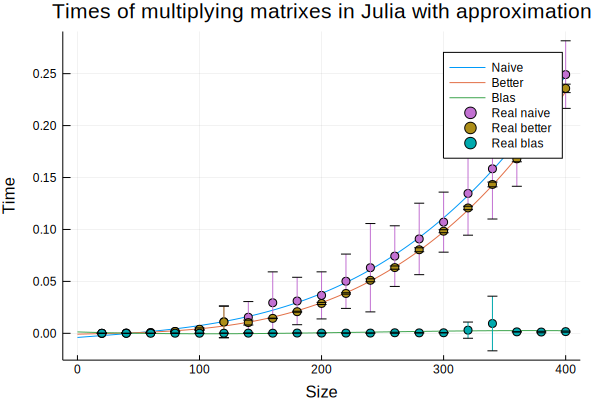

In [20]:
xd=0:1:400
plot(xd,[polyval(fit1, xd),polyval(fit2, xd),polyval(fit3, xd)],label=["Naive" "Better" "Blas"],xlabel="Size",ylabel="Time",title="Times of multiplying matrixes in Julia with approximation")
scatter!(prepared[:Size],prepared[:Naive_mean],label="Real naive",yerr=prepared[:Naive_std])
scatter!(prepared[:Size],prepared[:Better_mean],label ="Real better",yerr=prepared[:Better_std])
scatter!(prepared[:Size],prepared[:Blas_mean],label = "Real blas",yerr=prepared[:Blas_std])

In [21]:
using Polynomials
xs1 = times_grouped[:size]; ys1 = times_grouped[:time_naive_mean]
xs2 = times_grouped[:size]; ys2 = times_grouped[:time_better_mean]
xs3 = times_grouped[:size]; ys3 = times_grouped[:time_blas_mean]
fit1=polyfit(xs1, ys1,3)
fit2=polyfit(xs2, ys2,3)
fit3=polyfit(xs3,ys3,3)

Poly(-3.694191546700093e7 + 1.2662436129106847e6*x - 9955.871784518844*x^2 + 23.998845767025756*x^3)

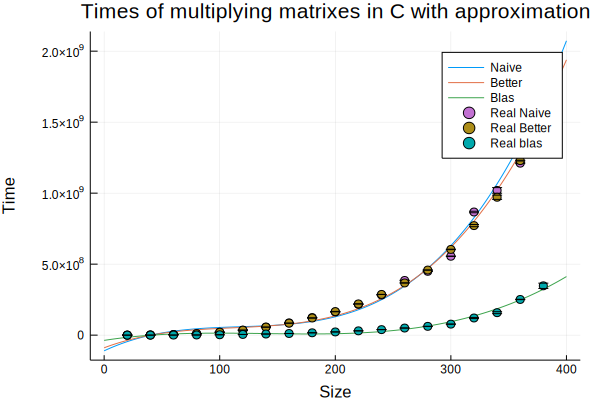

In [23]:
xd=0:1:400
plot(xd,[polyval(fit1, xd),polyval(fit2, xd),polyval(fit3, xd)],label=["Naive" "Better" "Blas"],xlabel="Size",ylabel="Time",title="Times of multiplying matrixes in C with approximation")
scatter!(times_grouped[:size],times_grouped[:time_naive_mean],label="Real Naive",yerr=times_grouped[:time_naive_std])
scatter!(times_grouped[:size],times_grouped[:time_better_mean],label ="Real Better",yerr=times_grouped[:time_better_std])
scatter!(times_grouped[:size],times_grouped[:time_blas_mean],label = "Real blas",yerr=times_grouped[:time_blas_std])

### Zadania
 
1.Uruchomi� 
   - naive_multiplication(A,B), 
   - better_multiplication(A,B) 
   - mno�enie BLAS w Julii (A*B) 

dla coraz wi�kszych macierzy i zmierzy� czasy. Narysowa� wykres zale�yno�ci czasu od rozmiaru macierzy wraz z s�upkami b��d�w, tak jak na poprzednim laboratorium. Wszystkie trzy metody powinny by� na jednym wykresie.
 
2.Napisa� w j�zyku C:
    - naiwn� metod� mno�enia macierzy (wersja 1) 
    - ulepszon� za pomoc� zamiany p�tli metod� mno�enia macierzy (wersja 2), pami�taj�c, �e w C macierz przechowywana jest wierszami (row major order tzn A11,A12, ..., A1m, A21, A22,...,A2m, ..Anm), inaczej ni� w Julii ! 
    - skorzysta� z  mo�liwo�ci BLAS dost�pnego w GSL(wersja 3). 
    
Nale�y por�wnywa� dzia�anie tych trzech algorytmow bez w��czonej opcji optymalizacji kompilatora. Przedstawi� wyniki na jednym wykresie tak jak w p.1.(osobno ni� p.1). (Dla ch�tnych) sprawdzi�, co si� dzieje, jak w��czymy optymalizacj� kompilatora i doda� do wykresu.

3.U�y� funkcji polyfit  z pakietu  Polynomials   do znalezienia odpowiednich wielomianow, ktore najlepiej pasuj� do zale�no�ci czasowych kazdego z algorytmow. Stopie� wielomianu powinien zgadza� si� z teoretyczn� z�o�onosci�. Doda� wykresy uzyskanych wielomianow do wczesniejszych  wykres�w.

